# Task 4: Time-delay embedding

In [3]:
from utils import *

% matplotlib inline
%load_ext autoreload
%autoreload 2

## Part 1: Embedding periodic signal into state space

Load the `takens_1.txt` dataset and plot the datapoints in 2D-space and the first coordinate $x_0(t)$ against time.

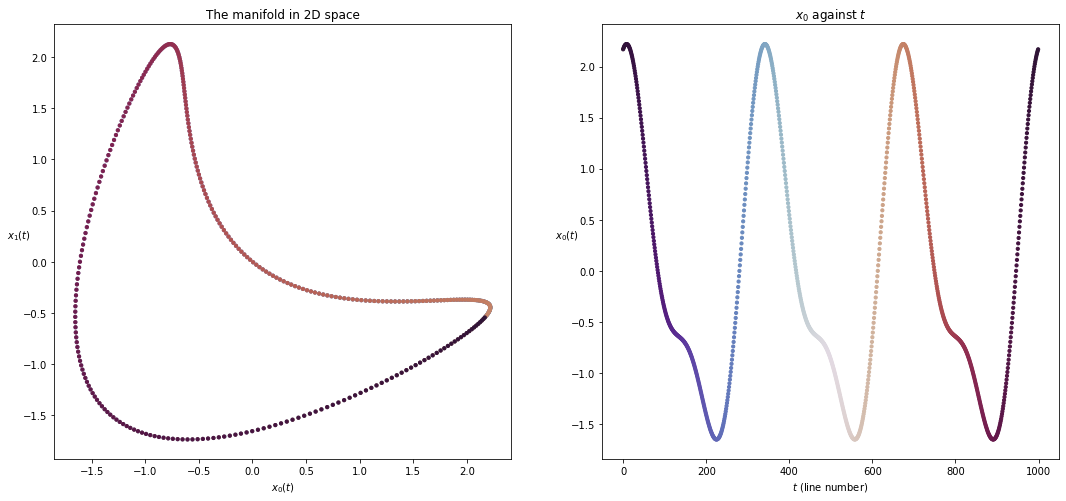

In [2]:
data = pd.read_csv("takens_1.txt", sep = " ", header = None)
data = data.rename(columns={0: "x_0", 1: "x_1"})
length = len(data)
index = np.arange(length)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 8))
ax0.scatter(data['x_0'], data['x_1'], c=index, cmap=plt.cm.twilight_shifted, s=10)
ax0.set_xlabel('$x_0(t)$')
ax0.set_ylabel('$x_1(t)$', rotation=0)
ax0.set_title('The manifold in 2D space')

ax1.scatter(index, data['x_0'], c=index, cmap=plt.cm.twilight_shifted, s=10)
ax1.set_xlabel('$t$ (line number)')
ax1.set_ylabel('$x_0(t)$', rotation=0)
ax1.set_title('$x_0$ against $t$')
plt.show()

In the first graph we plot the first coordinate $x_0(t)$ against its delayed version $x_0(t-\Delta n)$, where $\Delta n$ is the number of rows (time) by which $x_0(t)$ is delayed. 

At the same time, according to Takens theorem **we only need 3 coordinates to plot that the 1d series $x_0(t)$ is sure to be embedded correctly**. We can use a smooth diffeomorphism $\psi: \mathbb{R} \rightarrow \mathbb{R}$ defined as a shift operation $$\psi(t) = t-\Delta n$$ 
and the map $E_{(\psi, x_0)}: \mathbb{R} \rightarrow \mathbb{R}^3$ defined as $$E_{(\psi, x_0)}(t)=\left(x_0(t), x_0(\psi(t)), x_0(\psi(\psi(t)))\right)$$ to embed $x_0(t)$ from $\mathbb{R}$ into $\mathbb{R}^3$.

In the second graph the three line correspond with the three embedded coordinates $x_0(t), x_0(\psi(t)), x_0(\psi(\psi(t)))$ against time $t$, and in the last is the embedded vector result plotted in 3D space.

We also plot the results for the second coordinate $x_1(t)$, along with which there are **6 coordinates have we used in total to embed the entire periodic manifold**.

In [50]:
def bar(delta_n):
    plot_shift(data_shift(data['x_0'], delta_n), 'x_0', delta_n)
    plot_shift(data_shift(data['x_1'], delta_n), 'x_1', delta_n)

length = data.shape[0]
interact(bar, delta_n=widgets.IntSlider(min=1, max=length, value=20))

interactive(children=(IntSlider(value=20, description='delta_n', max=1000, min=1), Output()), _dom_classes=('w…

<function __main__.bar(delta_n)>

## Part 2: Approximating chaotic dynamics from time series

For the Lorenz system with $\sigma=10, \rho=28, \beta=\frac{8}{3}$, we split the calculated trajectories into its three coordinates and observe the behavior of each. By using Takens theorem and the shift operations similarly, we can embed each coordinates' projections of trajectory into 3 variables as aforementioned.

In [6]:
Tend = 20
dt = 0.001
x, y, z = lorenz_calculate(Tend=Tend, dt=dt, x0=10, y0=10, z0=10, s=10, r=28, b=8/3)

In [51]:
def bar(delta_t):
    delta_n = int(delta_t / dt)
    plot_shift(data_shift(x, delta_n), 'x', delta_n)
    plot_shift(data_shift(y, delta_n), 'y', delta_n)
    plot_shift(data_shift(z, delta_n), 'z', delta_n)

interact(bar, delta_t=widgets.FloatSlider(min=0.05, max=Tend*0.05, step=0.05, value=0.1))

interactive(children=(FloatSlider(value=0.1, description='delta_t', max=1.0, min=0.05, step=0.05), Output()), …

<function __main__.bar(delta_t)>

By observing the middle subplot in the figures, we could tell the reason why time-delay embedding for the $z$ coordinate fail to capture the behaviorism with attractor is because that the $z$-axis component of the original butterfly trajectory does not contain information about the bifurcation behavior at the beginning. The system's position on $z$-axis keeps orbiting within a same range of values, whereas on $x$ and $y$ axis could it exhibit the behavioral pattern of alternately oscillating around two different attractors. 

This can also be observed in the original 3D plot of the Lorenz attractor, where we can see that the underlying reason behind this phenomenon is that the centroids' position of the two attractors shares almost the same $z$ value, but distinctively not $x$ and $y$. In this way the system cannot tell which attractor the system is currently engaged with by only using information on the $z$ axis.

Text(0.5, 1.0, 'Projection on $(x, y)$ surface')

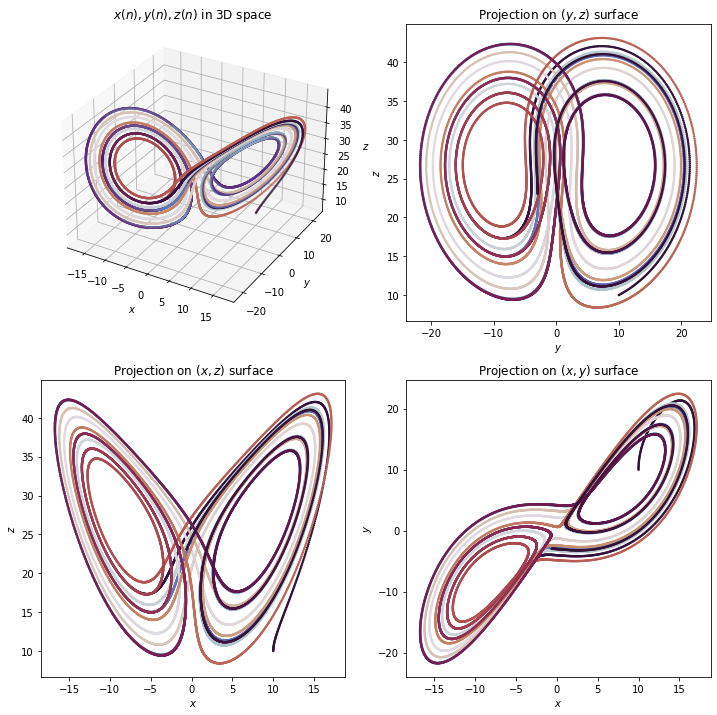

In [23]:
index = range(len(x))
fig = plt.figure(figsize=(12, 12))
ax0 = fig.add_subplot(221, projection='3d')
ax0.scatter(x, y, z, c=index, cmap=plt.cm.twilight_shifted, s=2)
ax0.set_xlabel('$x$')
ax0.set_ylabel('$y$')
ax0.set_zlabel('$z$')
ax0.set_title('$x(n), y(n), z(n)$ in 3D space')

ax1 = fig.add_subplot(222)
ax1.scatter(y, z, c=index, cmap=plt.cm.twilight_shifted, s=2)
ax1.set_xlabel('$y$')
ax1.set_ylabel('$z$')
ax1.set_title('Projection on $(y, z)$ surface')

ax2 = fig.add_subplot(223)
ax2.scatter(x, z, c=index, cmap=plt.cm.twilight_shifted, s=2)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$z$')
ax2.set_title('Projection on $(x, z)$ surface')

ax3 = fig.add_subplot(224)
ax3.scatter(x, y, c=index, cmap=plt.cm.twilight_shifted, s=2)
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')
ax3.set_title('Projection on $(x, y)$ surface')

## Bonus: Approximation of vector field for the Lorenz attractor

Take the shifted $x$-coordinate to approximate the vector field $\hat{\nu}$ of the Lorenz-attractor, and plot the shifted vector field from its starting positions in a quiver plot.

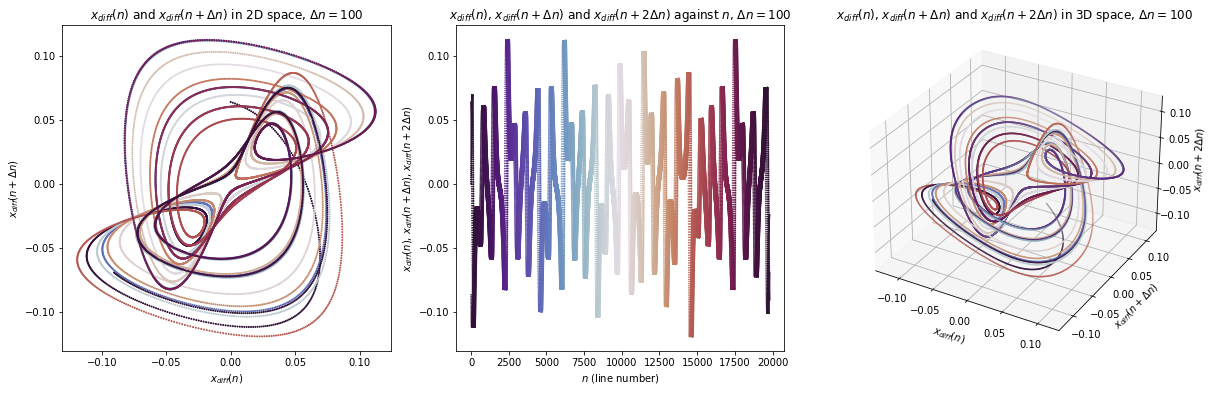

In [17]:
delta_t = 0.1
delta_n = int(delta_t / dt)
next_n = 1
positions, index = data_shift(x[:-next_n], delta_n)
targets, index = data_shift(x[next_n:], delta_n)

vectors = []
for i in range(3):
    vectors.append(targets[i] - positions[i])

length = len(vectors[0])
index = range(length)
plot_shift((vectors, index), 'x_{diff}', delta_n)

Text(0.5, 0.92, 'Reconstructed vector field in 3D space')

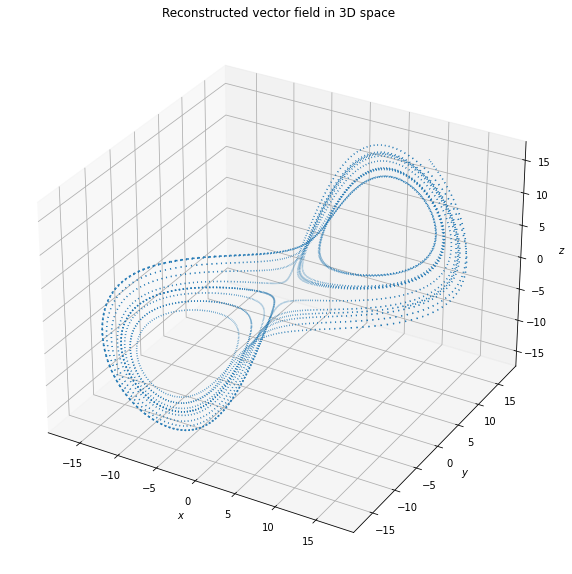

In [20]:
# concatenate the calculated positions and vectors into array of 3D vectors
positions_concatenated = np.concatenate(([positions[0]], [positions[1]], [positions[2]]))
vectors_concatenated = np.concatenate(([vectors[0]], [vectors[1]], [vectors[2]]))

# choose every 5th vector to plot,
# otherwise too many quivers become indistinguishable from each other and are too slow to draw
positions_plot = np.array([positions_concatenated[:,i] for i in range(0, length, 5)])
vectors_plot = np.array([vectors_concatenated[:,i] for i in range(0, length, 5)])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.quiver(*positions_plot.T, *vectors_plot.T)
ax.set_title('Reconstructed vector field in 3D space')